In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [163]:
data = pd.read_csv("../data/train.csv")

In [164]:
df = data

In [165]:
# Display basic information about the dataset and Missing Value Information 
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [166]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [167]:
df_description = df.describe(include="all")
print(df_description)

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

### Data Preprocessing

In [168]:
df_missing_values = df.isnull().sum()
print(df_missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [169]:
# Filling missing numerical values with the median of the respective column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

In [170]:
#To check if the missing numerical values have been filled 
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [171]:
# Fill missing categorical values with 'None' 
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('None')

In [172]:
#To check if the missing categorical values have been filled
print(df_missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [173]:
#Separating the target variable from the features
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']


In [ ]:
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
#Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [201]:
#Defining Transformations
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features), #To standardize the numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) #To one-hot encode the categorical features

])

In [ ]:
#Fitting the preprocessor only on X_train
preprocessor.fit(X_train)

# Transform both training and test sets
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [227]:
#Shape of the transformed dataset
print("X_trainTransformed Shape:",X_train_transformed.shape)
print("y shape:",y_train.shape)

X_trainTransformed Shape: (1168, 307)
y shape: (1168,)


# Feature Engineering : Creating Two New Features

In [203]:
#Age of the House in Years
df["HouseAge"] = 2025 - df["YearBuilt"]

#Total Livable Area in the House (above the basement)
df["TotalArea"] = df["GrLivArea"] + df["TotalBsmtSF"]

#Adding Two New Features 
X["HouseAge"] = df["HouseAge"]
X["TotalArea"] = df["TotalArea"]



# Reasoning for Creation of Features Above
HouseAge: Older houses migh be lower in price due to wear nd tear, while newer houses could be more valuable

TotalArea : A larger livable area would have a positive correlation with price

In [204]:
#Updating Feature List
numerical_features.extend(["HouseAge", "TotalArea"])

In [205]:
#Reapply transformations to include the new features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Training of Models

In [206]:
#Initializing Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate =0.1, random_state=42)

In [228]:
#Fit models
lr.fit(X_train_transformed, y_train)
rf.fit(X_train_transformed, y_train)
gbr.fit(X_train_transformed, y_train)

GradientBoostingRegressor(random_state=42)

In [229]:
#Predictions
y_pred_lr = lr.predict(X_train_transformed)
y_pred_rf = rf.predict(X_train_transformed)
y_pred_gbr = gbr.predict(X_train_transformed)

In [230]:
#Model Evaluation
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance: ")
    print(f"MSE: {mse : .4f}")
    print(f"R squared: {r2 : .4f} \n")

In [235]:
#Evaluating all models
evaluate_model("Linear Regression", y_train, y_pred_lr)
evaluate_model("Random Forest", y_train, y_pred_rf)
evaluate_model("Gradient Boosting", y_train, y_pred_gbr)

Linear Regression Performance: 
MSE:  357363698.6460
R squared:  0.9401 

Random Forest Performance: 
MSE:  116694545.0849
R squared:  0.9804 

Gradient Boosting Performance: 
MSE:  164267024.8415
R squared:  0.9725 



# Testing the Model 

In [211]:
df_test = pd.read_csv("../data/test.csv")

In [212]:
df_missing_values = df.isnull().sum()
print(df_missing_values)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
HouseAge         0
TotalArea        0
Length: 83, dtype: int64


In [213]:
# Storing Test IDs for Submission
test_ids = df_test['Id']

In [214]:
#Drop ID Column
X_test = df_test.drop(columns=['Id'])

In [215]:
# First, handle missing values in YearBuilt, GrLivArea, and TotalBsmtSF before creating new features
X_test["YearBuilt"] = X_test["YearBuilt"].fillna(X_test["YearBuilt"].median())
X_test["GrLivArea"] = X_test["GrLivArea"].fillna(X_test["GrLivArea"].median())
X_test["TotalBsmtSF"] = X_test["TotalBsmtSF"].fillna(X_test["TotalBsmtSF"].median())



In [216]:

# Now, create new features for HouseAge and TotalArea
X_test["HouseAge"] = 2025 - X_test["YearBuilt"]
X_test["TotalArea"] = X_test["GrLivArea"] + X_test["TotalBsmtSF"]

In [217]:

# Ensure the numerical features list includes the new features
numerical_features.extend(["HouseAge", "TotalArea"])


In [218]:
# Find missing columns in X_test
missing_columns = [col for col in numerical_features if col not in X_test.columns]
print("Columns missing from X_test:", missing_columns)


Columns missing from X_test: []


In [219]:
# Handle missing values in numerical columns
for col in numerical_features:
    X_test[col] = X_test[col].fillna(X_test[col].median())


In [220]:

# Handle missing values in categorical columns
X_test[categorical_features] = X_test[categorical_features].fillna('None')

In [223]:
#Printing the Tranformed Test Dataset Shape
print("X_test_transformed shape:", X_test_transformed.shape)

X_test_transformed shape: (292, 303)


In [233]:
#Making Predictions on Test Dataset Using the Best Model (Random Tree)
y_test_pred = rf.predict(X_test_transformed)

In [234]:
#Creating the Submission DataFrame
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': y_test_pred})
submission.to_csv('house_price_predictions.csv', index=False)

# Interpretation

In [236]:
#Obtaining the feature importances from the best Model ie. Random Forest
feature_importance = rf.feature_importances_

In [237]:
#Creating a DataFram for visualization
feature_importance_df = pd.DataFrame({'Feature': numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out()),
                                      'Importance': feature_importance}).sort_values('Importance', ascending=False)

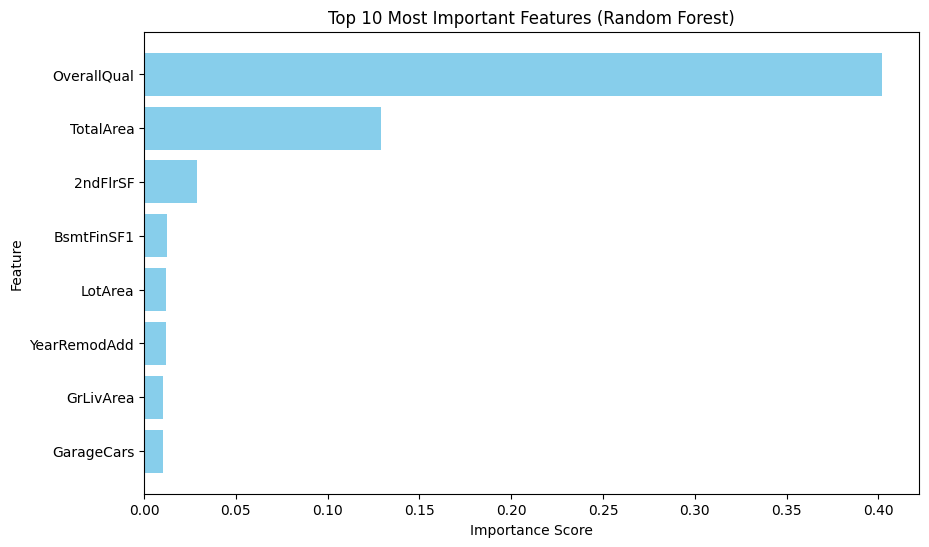

In [238]:
#Plotting The Top Features
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

This visualization shows that features with higher importance scores contribute more to the model's predictions

Location Based Features such as TotalArea have high importance and aligns with real estate pricing intuition

# How the Model's Predictions align with Real-World Intuition
High R-squared values denote a strong predictive power, this means that the model can effectivel capture relationships between features and housing prices

Important Features align with economic and real estate principles a example of this is Larger Living Area translating into higher home prices

# Why a Generative Model (e.g., GAN, VAE) is NOT Suitable for This Regression Problem
GANs (Generative Adversarial Networks) and VAEs (Variational Autoencoders) are widely used for creating new data points which is used in data synthesis(e.g., generative images). But, in reality, we expect exact numbers as outputs, house price, for example, rather than data that looks realistic. For instance, a GAN could produce realistic features of a house but would be unable to generate a numeric output for a price prediction of a given house.
Regression problems are focused on numnerical predictions, not data generation, therefore using a GAN in this regression problem would not improve predictions of the model
